In [1]:
!wget https://s3.amazonaws.com/oksoft/Mumbai.shp

!wget https://s3.amazonaws.com/oksoft/Mumbai.shx

!wget https://s3.amazonaws.com/oksoft/Mumbai.prj

!wget https://s3.amazonaws.com/oksoft/Mumbai.dbf


--2016-08-09 10:40:52--  https://s3.amazonaws.com/oksoft/Mumbai.shp
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.112.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.112.91|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2016-08-09 10:40:52 ERROR 403: Forbidden.

--2016-08-09 10:40:52--  https://s3.amazonaws.com/oksoft/Mumbai.shx
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.112.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.112.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292 [application/octet-stream]
Saving to: ‘Mumbai.shx.4’

Mumbai.shx.4        100%[=====================>]     292  --.-KB/s   in 0s     

2016-08-09 10:40:53 (6.71 MB/s) - ‘Mumbai.shx.4’ saved [292/292]

--2016-08-09 10:40:53--  https://s3.amazonaws.com/oksoft/Mumbai.prj
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.112.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.112.91|:443... connected.
H

In [2]:
import geopandas as gpd
gdf = gpd.GeoDataFrame.from_file('Mumbai.shp')
gdf.head()

,geometry,gid,name,objectid_1,shape_area,shape_leng
0,"POLYGON ((72.84025394816599 18.94880846402114,...",1,A,1,1.120911e+07,23100.418607
1,"POLYGON ((72.84456460607964 18.96342340102168,...",2,B,2,2.658217e+06,8322.589466
2,"POLYGON ((72.83197689961185 18.96174459940285,...",3,C,3,1.913026e+06,6389.304749
3,"POLYGON ((72.818725814261 18.96900560547717, 7...",4,D,4,8.223427e+06,16048.789624
4,"POLYGON ((72.84677216249192 18.98183417917781,...",5,E,5,7.273882e+06,15964.521869


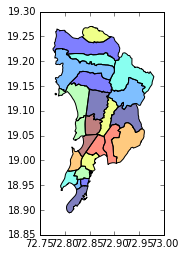

In [3]:
%matplotlib inline
gdf.plot()

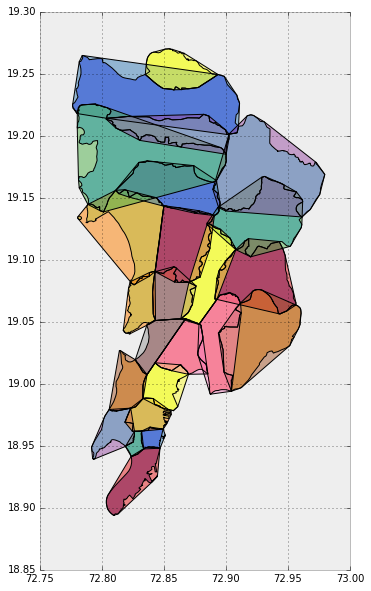

In [4]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

hulls = gdf['geometry'].convex_hull

# plot overlay
hulls.plot(ax=gdf.plot())

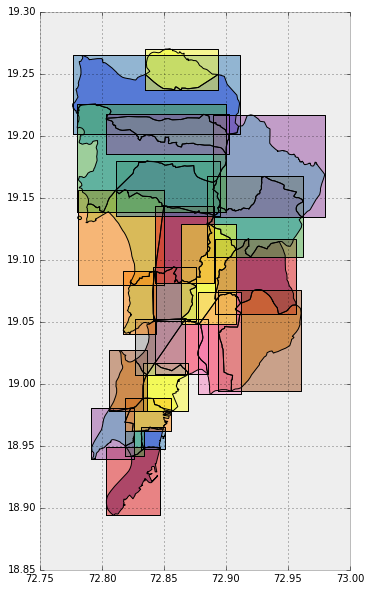

In [5]:
envelope = gpd.GeoSeries(hulls.envelope)

# plot overlay
envelope.plot(ax=gdf.plot())

In [6]:
from shapely.geometry import Point

def sim_users(n, p, f):

    # create datetime range
    today = datetime.today().strftime("%m/%d/%Y")
    rng = pd.date_range(today, periods=p, freq=f)

    # get min/max coorindates
    min_x, min_y = gdf['geometry'].bounds.ix[:,:2].min()
    max_x, max_y = gdf['geometry'].bounds.ix[:,2:].max()

    # iterate over time datetime range and create user list
    sim_user_list = []
    for ts in tqdm_notebook(rng, desc='Progress', leave=True):
        for j in xrange(n):
            x = uniform(min_x, max_x)
            y = uniform(min_y, max_y)
            point = Point(x, y)
            gender = randint(0, 1)
            sim_user_list.append([ts, x, y, point, gender])

    # return dataframe
    sim_user_df = pd.DataFrame(sim_user_list, columns=['datetime', 'x', 'y', 'point', 'gender'])
    return sim_user_df

from datetime import datetime
import pandas as pd
from random import randint, uniform

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# simulate user data
sim_data = sim_users(100, 24, 'H')
sim_data.head()


,datetime,x,y,point,gender
0,2016-08-09,72.929331,19.182739,POINT (72.92933102955077 19.18273908863475),1
1,2016-08-09,72.782666,19.110129,POINT (72.78266606502032 19.1101292654556),0
2,2016-08-09,72.923616,18.997554,POINT (72.92361636714919 18.99755432859675),0
3,2016-08-09,72.955144,19.109454,POINT (72.95514392846296 19.1094542468259),0
4,2016-08-09,72.815537,18.963681,POINT (72.81553722932073 18.96368069247626),0


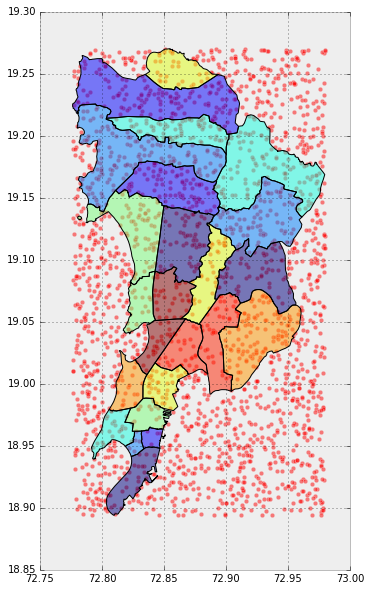

In [8]:
gdf.plot()
plt.scatter(x=sim_data['x'], y=sim_data['y'], alpha=0.5, c='r')

In [ ]:
#http://blog.yhat.com/posts/interactive-geospatial-analysis.html